In [1]:
import PyPDF2
import requests
import numpy as np, seaborn as sns, pandas as pd
import nltk, nltk.sentiment, sklearn
import collections
%matplotlib inline

In [2]:
#convert list to pd.series
#doc1_str = pd.Series([''.join(doc1)])

#Preprocessing - tokenize and lower case pdf-strings
tokenizer = nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    string = string.lower()
    string = tokenizer.tokenize(string)
    return string

#Apply positive/negative sets on pdf-string
#tok_doc1 = doc1_str.apply(preprocessing)

def count_dictionary(document_elem, dictionary):
    lst = []
    for word in document_elem:
        if (word in dictionary):
            lst.append(word)
    return len(lst)


In [3]:
#PDF extractor script. Creates a list separated per page.
def pdf_extractor(path):
    pdf_file = open(path, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    res1 = []
    for i in range(len(c)):
        page = read_pdf.getPage(i)
        page_content = page.extractText()
        res1.append(page_content)
    return res1
   

In [4]:
import requests

#Create set for negative and positive lexicon
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')[2].split('\n')[2:])
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')[2].split('\n')[2:])

In [23]:
bow = r'C:\Users\sebag\Documents\GitHub\SDS Group 35\Exam_Project\bow.xlsx'

pos_neg = pd.read_excel(bow, '1 FS Dictionary')

positive_cb = pos_neg.loc[pos_neg['Positive'] == 1.0]
positive_cb = set(positive_cb['Word'])
positive_cb

negative_cb = pos_neg.loc[pos_neg['Negative'] == 1.0]
negative_cb = set(negative_cb['Word'])
negative_cb

{'abnormally',
 'abrupt',
 'abundant',
 'adverse',
 'adversely',
 'aggravate',
 'aggravated',
 'aggravating',
 'aggravation',
 'ailing',
 'alarming',
 'anxiety',
 'arrears',
 'bad',
 'burdened',
 'challenge',
 'challenges',
 'challenging',
 'closure',
 'clouded',
 'compromised',
 'concern',
 'concerns',
 'confronted',
 'confronting',
 'constrain',
 'constrained',
 'constraining',
 'contagion',
 'contracted',
 'contracting',
 'contraction',
 'corrections',
 'costly',
 'damaging',
 'danger',
 'dangerous',
 'declines',
 'deep',
 'deeply',
 'defaults',
 'deficient',
 'deficits',
 'delays',
 'delinquencies',
 'dented',
 'depress',
 'depressed',
 'depressing',
 'destabilising',
 'destabilizing',
 'deteriorate',
 'deteriorated',
 'deteriorating',
 'deterioration',
 'deteriorations',
 'detrimental',
 'difficult',
 'difficulties',
 'difficulty',
 'disappointing',
 'discouraging',
 'disorderly',
 'disrupt',
 'disrupted',
 'disruption',
 'disruptions',
 'disruptive',
 'distortions',
 'distress',


In [91]:
'improve' in positive_cb

True

In [66]:
import os

#Sebastian file path
basedir = r'C:\Users\sebag\Documents\GitHub\SDS Group 35\Exam_Project\Minutes_PDF'
testdir = r'C:\Users\sebag\Documents\GitHub\Exam\Test folder'

def sentiment_analysis(pos, neg, file_path):
    pos_words = []
    neg_words = []
    average_tone = []
    i = 0
    error = []
    
    for fn in os.listdir(file_path):
        try:
            print('Now treating file: ' + fn + '\nIterate: ' + str(i))
            doc = pdf_extractor(file_path + '\\' + fn)
            doc = pd.Series([''.join(doc)])
            doc = doc.apply(preprocessing)

            pos_words.append(int(count_dictionary(doc[0], pos)))
            neg_words.append(int(count_dictionary(doc[0], neg)))
            average_tone.append((pos_words[i]-neg_words[i])/len(doc[0]))
            error.append(False)  
            
            i += 1
        
        except KeyError:
            error.append(True)
            pos_words.append(np.NaN)
            neg_words.append(np.NaN)
            average_tone.append(np.NaN)
            
            i += 1
            
        #date = re.findall(r'\d+', fn)
    df = pd.DataFrame(zip(pos_words, neg_words, average_tone, error))
    return df

sent_df = sentiment_analysis(positive_cb, negative_cb, basedir)


Now treating file: ppp000203e.pdf
Iterate: 0


Now treating file: ppp000322e.pdf
Iterate: 1
Now treating file: ppp000504e.pdf
Iterate: 2
Now treating file: ppp000607e.pdf
Iterate: 3
Now treating file: ppp000706e.pdf
Iterate: 4
Now treating file: ppp000816e.pdf
Iterate: 5
Now treating file: ppp001024e.pdf
Iterate: 6
Now treating file: ppp001220e.pdf
Iterate: 7
Now treating file: ppp010201e.pdf
Iterate: 8
Now treating file: ppp010326e.pdf
Iterate: 9
Now treating file: ppp010426e.pdf
Iterate: 10
Now treating file: ppp010530e.pdf
Iterate: 11
Now treating file: ppp010614e.pdf
Iterate: 12
Now treating file: ppp010705e.pdf
Iterate: 13
Now treating file: ppp010823e.pdf
Iterate: 14
Now treating file: ppp010917e.pdf
Iterate: 15
Now treating file: ppp011015e.pdf
Iterate: 16
Now treating file: ppp011108e.pdf
Iterate: 17
Now treating file: ppp011204e.pdf
Iterate: 18
Now treating file: ppp020207e.pdf
Iterate: 19
Now treating file: ppp020318e.pdf
Iterate: 20
Now treating file: ppp020425e.pdf
Iterate: 21
Now treating file: ppp020605e.pdf
Iterate: 

In [67]:
sent_df.columns = ['Number of positive words', 'Number of negative words', 'Average tone ratio', 'Error in processing PDF']
#print(sent_df.loc[sent_df['Number of positive words'] == True])
len(list(filter(lambda x: x > 0, sent_df['Average tone ratio'])))
sent_df

,Number of positive words,Number of negative words,Average tone ratio,Error in processing PDF
0,30,35,-0.000822,False
1,11,19,-0.001847,False
2,20,25,-0.001100,False
3,12,21,-0.002571,False
4,12,28,-0.003221,False
5,12,21,-0.002571,False
6,9,30,-0.005189,False
7,25,50,-0.004305,False
8,20,95,-0.013296,False
9,16,55,-0.009266,False


In [68]:
import os, re, pandas as pd, ast, datetime

#Mark file path:
path = 'C:/Users/maje.DKSUND/Desktop/SDS-Group-35-master_new/SDS-Group-35-master/Exam_Project/Minutes_PDF'

files = []
files2 = []

# r=root, d=directories, f = files
for r, d, f in os.walk(basedir):
    for file in f:
        if '.pdf' in file:
            files.append('20' + file[3:5] + "-" + file[5:7] + "-" + file[7:9])
            files2.append(file)

Final_list = {'Dato':files,'Filnavn':files2}

df_files = pd.DataFrame(Final_list)
df_files['date_time'] = pd.to_datetime(df_files['Dato'])
df_files['Date time announcement'] = pd.to_datetime(df_files['Dato']) + pd.DateOffset(days=1)
df_files

,Dato,Filnavn,date_time,Date time announcement
0,2000-02-03,ppp000203e.pdf,2000-02-03,2000-02-04
1,2000-03-22,ppp000322e.pdf,2000-03-22,2000-03-23
2,2000-05-04,ppp000504e.pdf,2000-05-04,2000-05-05
3,2000-06-07,ppp000607e.pdf,2000-06-07,2000-06-08
4,2000-07-06,ppp000706e.pdf,2000-07-06,2000-07-07
5,2000-08-16,ppp000816e.pdf,2000-08-16,2000-08-17
6,2000-10-24,ppp001024e.pdf,2000-10-24,2000-10-25
7,2000-12-20,ppp001220e.pdf,2000-12-20,2000-12-21
8,2001-02-01,ppp010201e.pdf,2001-02-01,2001-02-02
9,2001-03-26,ppp010326e.pdf,2001-03-26,2001-03-27


In [69]:
sent_df = pd.concat([sent_df, pd.Series(df_files['Date time announcement'])], axis = 1, join = 'inner')
sent_df

,Number of positive words,Number of negative words,Average tone ratio,Error in processing PDF,Date time announcement
0,30,35,-0.000822,False,2000-02-04
1,11,19,-0.001847,False,2000-03-23
2,20,25,-0.001100,False,2000-05-05
3,12,21,-0.002571,False,2000-06-08
4,12,28,-0.003221,False,2000-07-07
5,12,21,-0.002571,False,2000-08-17
6,9,30,-0.005189,False,2000-10-25
7,25,50,-0.004305,False,2000-12-21
8,20,95,-0.013296,False,2001-02-02
9,16,55,-0.009266,False,2001-03-27


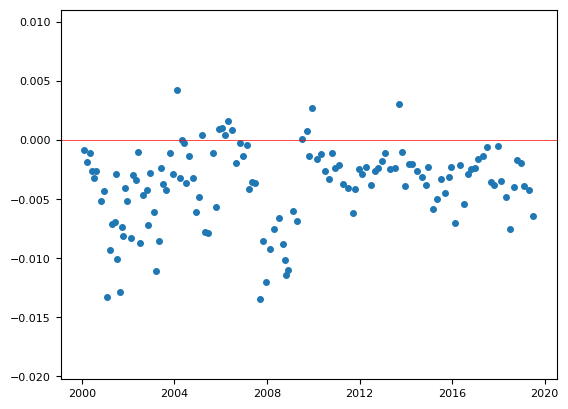

In [83]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,4)
plt.style.use('default')
plt.rcParams.update({'font.size': 8})
plt.rcParams['lines.markersize'] = 4

x = np.array(sent_df['Date time announcement'])
y = np.array(sent_df['Average tone ratio'])

# fit = np.polyfit(x, y, 4)
# fit_fn = poly1d(fit)
# print(fit_fn)

# x_new = np.linspace(x[0], x[-1], 50)
# y_new = f(x_new)

plt.scatter(x, y)#, 'o', x_new, y_new)
# plt.plot(x, y, fit)
plt.axhline(y = 0, color = 'r', linestyle = '-', linewidth = 0.5)
plt.show
plt.savefig('Sentiment_scatter.png')